In [1]:
from pySnowRadar.processing import geo_filter, batch_process
from pySnowRadar import SnowRadar
from pySnowRadar.processing import extract_layers, geo_filter
from pySnowRadar.algorithms import Wavelet_JK
from pySnowRadar.qc import error_check

from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
def plot_retreival(sr, res, ylim=None):
    '''
    Generic plotting function to visualize the radar data for the 
    current SnowRadar object instance

    Arguments:
        ylim: customize the upper bound of the plot
    '''
    with np.errstate(divide='ignore', invalid='ignore'):
            radar_sub = 10 * np.log10(sr.data_radar)
            
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(9,7), sharex=True)
    #fig, ax = plt.subplots(figsize=(9,7))
    im = ax1.imshow(radar_sub, cmap='gist_gray')
    
    ax1.scatter(res.index.astype(int), 
                res['b_as'], 
                color='b',
                s = 1,
                label = 'A-S')
    
    ax1.scatter(res.index.astype(int), 
                res['b_si'], 
                color='r',
                s = 1,
                label = 'S-I')
    
    ax1.set_title(
        f'{sr.file_name} ({sr.data_type})',
        fontdict={'size':'x-large'}
        )
    if ylim:
        ax1.set_ylim(ylim)
    
    ax1.set_xlim(0, sr.data_radar.shape[1])
    ax1.set_aspect('auto')
    
    ax2.scatter(res.index.astype(int), 
                res.snow_depth,
                s = 1,
                color = 'k')
    
    #fig.colorbar(im, ax=ax1)
    fig.tight_layout()
    plt.show()

In [3]:
# Load the SR meta data into a dataframe
input_sr_data = glob('F:/Data/SR/20190412_03/*.mat')
sr_meta = [SnowRadar(sr, 'meta') for sr in input_sr_data]
sr_gdf = gpd.GeoDataFrame(
        data={'file': [sr.file_path for sr in sr_meta]}, 
        geometry=[sr.line for sr in sr_meta], 
        crs={'init': 'epsg:4326'}
    )

Loading: Data_20190412_03_001.mat (meta)


C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\snowradar.py:97: UserWarning: No value for fmult found, using fmult = 1
  warnings.warn('No value for fmult found, using fmult = 1', UserWarning)


Loading: Data_20190412_03_002.mat (meta)
Loading: Data_20190412_03_003.mat (meta)
Loading: Data_20190412_03_004.mat (meta)
Loading: Data_20190412_03_005.mat (meta)
Loading: Data_20190412_03_006.mat (meta)
Loading: Data_20190412_03_007.mat (meta)
Loading: Data_20190412_03_008.mat (meta)
Loading: Data_20190412_03_009.mat (meta)
Loading: Data_20190412_03_010.mat (meta)
Loading: Data_20190412_03_011.mat (meta)
Loading: Data_20190412_03_012.mat (meta)
Loading: Data_20190412_03_013.mat (meta)
Loading: Data_20190412_03_014.mat (meta)
Loading: Data_20190412_03_015.mat (meta)
Loading: Data_20190412_03_016.mat (meta)
Loading: Data_20190412_03_017.mat (meta)
Loading: Data_20190412_03_018.mat (meta)
Loading: Data_20190412_03_019.mat (meta)
Loading: Data_20190412_03_020.mat (meta)
Loading: Data_20190412_03_021.mat (meta)
Loading: Data_20190412_03_022.mat (meta)
Loading: Data_20190412_03_023.mat (meta)
Loading: Data_20190412_03_024.mat (meta)
Loading: Data_20190412_03_025.mat (meta)
Loading: Data_20

Loading: Data_20190412_03_202.mat (meta)
Loading: Data_20190412_03_203.mat (meta)
Loading: Data_20190412_03_204.mat (meta)
Loading: Data_20190412_03_205.mat (meta)
Loading: Data_20190412_03_206.mat (meta)
Loading: Data_20190412_03_207.mat (meta)
Loading: Data_20190412_03_208.mat (meta)
Loading: Data_20190412_03_209.mat (meta)
Loading: Data_20190412_03_210.mat (meta)
Loading: Data_20190412_03_211.mat (meta)
Loading: Data_20190412_03_212.mat (meta)
Loading: Data_20190412_03_213.mat (meta)
Loading: Data_20190412_03_214.mat (meta)
Loading: Data_20190412_03_215.mat (meta)
Loading: Data_20190412_03_216.mat (meta)
Loading: Data_20190412_03_217.mat (meta)
Loading: Data_20190412_03_218.mat (meta)
Loading: Data_20190412_03_219.mat (meta)
Loading: Data_20190412_03_220.mat (meta)
Loading: Data_20190412_03_221.mat (meta)
Loading: Data_20190412_03_222.mat (meta)
Loading: Data_20190412_03_223.mat (meta)
Loading: Data_20190412_03_224.mat (meta)
Loading: Data_20190412_03_225.mat (meta)
Loading: Data_20

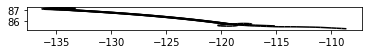

In [4]:
flight_lines = sr_gdf.plot(color='black', edgecolor='black', label = 'SnowRadar')

In [5]:
geo_filtered = geo_filter(sr_gdf.file)


Loading: Data_20190412_03_001.mat (meta)


C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\snowradar.py:97: UserWarning: No value for fmult found, using fmult = 1
  warnings.warn('No value for fmult found, using fmult = 1', UserWarning)


Loading: Data_20190412_03_002.mat (meta)
Loading: Data_20190412_03_003.mat (meta)
Loading: Data_20190412_03_004.mat (meta)
Loading: Data_20190412_03_005.mat (meta)
Loading: Data_20190412_03_006.mat (meta)
Loading: Data_20190412_03_007.mat (meta)
Loading: Data_20190412_03_008.mat (meta)
Loading: Data_20190412_03_009.mat (meta)
Loading: Data_20190412_03_010.mat (meta)
Loading: Data_20190412_03_011.mat (meta)
Loading: Data_20190412_03_012.mat (meta)
Loading: Data_20190412_03_013.mat (meta)
Loading: Data_20190412_03_014.mat (meta)
Loading: Data_20190412_03_015.mat (meta)
Loading: Data_20190412_03_016.mat (meta)
Loading: Data_20190412_03_017.mat (meta)
Loading: Data_20190412_03_018.mat (meta)
Loading: Data_20190412_03_019.mat (meta)
Loading: Data_20190412_03_020.mat (meta)
Loading: Data_20190412_03_021.mat (meta)
Loading: Data_20190412_03_022.mat (meta)
Loading: Data_20190412_03_023.mat (meta)
Loading: Data_20190412_03_024.mat (meta)
Loading: Data_20190412_03_025.mat (meta)
Loading: Data_20

Loading: Data_20190412_03_202.mat (meta)
Loading: Data_20190412_03_203.mat (meta)
Loading: Data_20190412_03_204.mat (meta)
Loading: Data_20190412_03_205.mat (meta)
Loading: Data_20190412_03_206.mat (meta)
Loading: Data_20190412_03_207.mat (meta)
Loading: Data_20190412_03_208.mat (meta)
Loading: Data_20190412_03_209.mat (meta)
Loading: Data_20190412_03_210.mat (meta)
Loading: Data_20190412_03_211.mat (meta)
Loading: Data_20190412_03_212.mat (meta)
Loading: Data_20190412_03_213.mat (meta)
Loading: Data_20190412_03_214.mat (meta)
Loading: Data_20190412_03_215.mat (meta)
Loading: Data_20190412_03_216.mat (meta)
Loading: Data_20190412_03_217.mat (meta)
Loading: Data_20190412_03_218.mat (meta)
Loading: Data_20190412_03_219.mat (meta)
Loading: Data_20190412_03_220.mat (meta)
Loading: Data_20190412_03_221.mat (meta)
Loading: Data_20190412_03_222.mat (meta)
Loading: Data_20190412_03_223.mat (meta)
Loading: Data_20190412_03_224.mat (meta)
Loading: Data_20190412_03_225.mat (meta)
Loading: Data_20

In [59]:
#cur_idx = np.random.randint(low=0, high=len(geo_filtered), size=1)
cur_file = geo_filtered[cur_idx[0]]
#cur_file = geo_filtered[0]

snow_density = 0.3
r_idx = np.sqrt((1 + 0.51 * snow_density) ** 3)
radar_dat = SnowRadar(cur_file, 'full')
radar_dat.surf_bin, radar_dat.surface = radar_dat.get_surface()
radar_dat.calcpulsewidth()
lower, upper = radar_dat.get_bounds(m_above=5)
radar_subset = radar_dat.data_radar[upper:lower, :]

Loading: Data_20190412_03_188.mat (full)


In [68]:
radar_dat.dfr*2

0.038271377617180836

In [60]:
error_codes = pd.Series(error_check(radar_dat).tolist())

In [61]:
params={'snow_density':0.3,
        'ref_snow_layer': 1,
        'cwt_precision': 10}

res = extract_layers(cur_file, picker=Wavelet_JK, params=params, dump_results=False)

Loading: Data_20190412_03_188.mat (full)


In [62]:
res.b_si = res.b_si.rolling(window=5).median()
res.b_as = res.b_as.rolling(window=5).median()

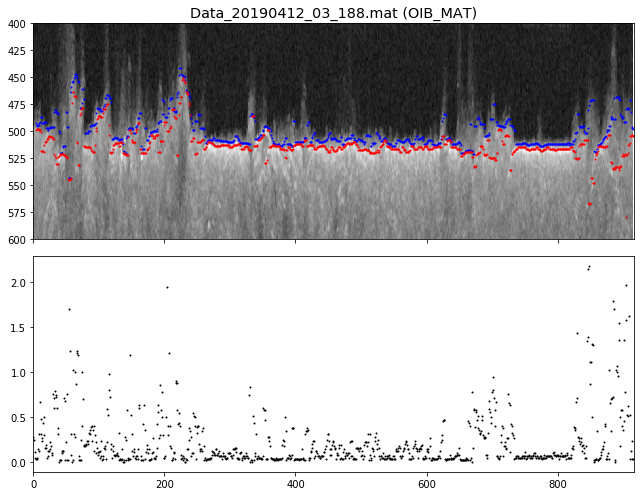

In [63]:
plot_retreival(radar_dat, res, ylim=(600,400))


In [75]:
res.snow_depth[res.snow_depth<(radar_dat.dfr*3)] = np.nan

C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(array([  4.,  32.,  88.,  97., 127.,  61.,  51.,  38.,  48.,  43.,  17.,
         24.,  17.,  12.,  11.,  11.,  13.,  16.,   8.,   8.,   9.,   8.,
          9.,  10.,   6.,   9.,  11.,   6.,   6.,   3.,   3.,  10.,   2.,
          9.,   4.,   2.,   7.,   4.,   2.,   3.,   2.,   4.,   6.,   2.,
          3.,   2.,   3.,   4.,   3.,   0.,   4.,   1.,   1.,   0.,   1.,
          0.,   0.,   1.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   4.,
          3.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,
          4.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

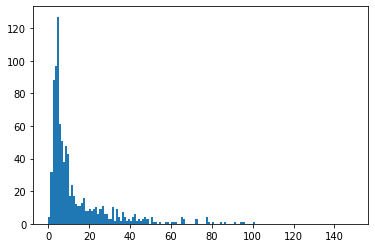

In [76]:
bins = np.arange(0, 150, 1)
plt.hist(res.b_si - res.b_as, bins = bins)

In [77]:
res.snow_depth.mean()

0.30094099190808055

(array([  0., 104.,  96.,  70.,  64.,  25.,  37.,  19.,  29.,  17.,  24.,
          8.,  14.,   9.,  15.,   7.,   7.,   5.,  10.,   5.,   5.,   3.,
          3.,   3.,   1.,   2.,   6.,   1.,   0.,   2.,   0.,   4.,   2.,
          1.,   1.,   3.,   1.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,
          2.,   0.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([0.        , 0.03827138, 0.07654276, 0.11481413, 0.15308551,
        0.19135689, 0.22962827, 0.26789964, 0.30617102, 0.3444424 ,
        0.38271378, 0.42098515, 0.45925653, 0.49752791, 0.53579929,
        0.57407066, 0.61234204, 0.65061342, 0.6888848 , 0.72715617,
        0.76542755, 0.80369893, 0.84197031, 0.88024169, 0.91851306,
        0.95678444, 0.99505582, 1.0333272 , 1.07159857, 1.10986995,
        1.14814133, 1.18641271, 1.22468408, 1.26295546, 1.30122684,
        1.33949822, 1.37776959, 1.41604097, 1.45431235, 1.49258373,
        1.5308551 , 1.56912648, 1.60739786, 1.64566924, 1.68394062,
        1.72221199, 1.76048337, 1.

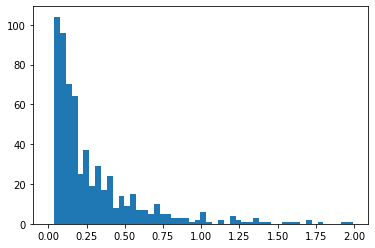

In [81]:
bins_snow = np.arange(0, 2, radar_dat.dfr*2)
plt.hist(res.snow_depth, bins = bins_snow)

# Batch processing 

In [82]:
params={'ref_snow_layer': 1,
        'cwt_precision': 10,
        'snow_density': 0.3}

In [83]:
res = batch_process(geo_filtered, Wavelet_JK, params, workers =  7)

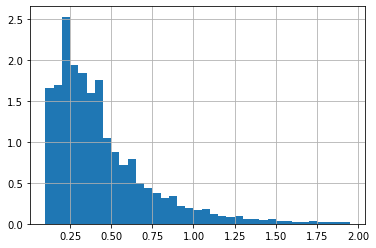

In [84]:
bins = np.arange(0.1, 2, 0.05)
res.snow_depth.hist(bins = bins, density = True)

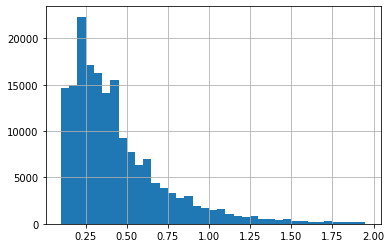

In [85]:
bins = np.arange(0.1, 2, 0.05)

res.snow_depth[res.snow_depth<2].hist(bins = bins)

In [86]:
res.snow_depth[res.snow_depth<2].mean()

0.3126995292654697

In [87]:
# Generate error codes for remaining SR data
sr_data = [SnowRadar(sr, 'full') for sr in geo_filtered]
error_codes = [pd.Series(error_check(sr).tolist()) for sr in sr_data]

Loading: Data_20190412_03_001.mat (full)
Loading: Data_20190412_03_002.mat (full)
Loading: Data_20190412_03_003.mat (full)
Loading: Data_20190412_03_004.mat (full)
Loading: Data_20190412_03_005.mat (full)
Loading: Data_20190412_03_006.mat (full)
Loading: Data_20190412_03_007.mat (full)
Loading: Data_20190412_03_008.mat (full)
Loading: Data_20190412_03_009.mat (full)
Loading: Data_20190412_03_010.mat (full)
Loading: Data_20190412_03_011.mat (full)
Loading: Data_20190412_03_012.mat (full)
Loading: Data_20190412_03_013.mat (full)
Loading: Data_20190412_03_014.mat (full)
Loading: Data_20190412_03_015.mat (full)
Loading: Data_20190412_03_016.mat (full)
Loading: Data_20190412_03_017.mat (full)
Loading: Data_20190412_03_018.mat (full)
Loading: Data_20190412_03_019.mat (full)
Loading: Data_20190412_03_020.mat (full)
Loading: Data_20190412_03_021.mat (full)
Loading: Data_20190412_03_022.mat (full)
Loading: Data_20190412_03_023.mat (full)
Loading: Data_20190412_03_024.mat (full)
Loading: Data_20

Loading: Data_20190412_03_201.mat (full)
Loading: Data_20190412_03_202.mat (full)
Loading: Data_20190412_03_203.mat (full)
Loading: Data_20190412_03_204.mat (full)
Loading: Data_20190412_03_205.mat (full)
Loading: Data_20190412_03_206.mat (full)
Loading: Data_20190412_03_207.mat (full)
Loading: Data_20190412_03_208.mat (full)
Loading: Data_20190412_03_209.mat (full)
Loading: Data_20190412_03_210.mat (full)
Loading: Data_20190412_03_211.mat (full)
Loading: Data_20190412_03_212.mat (full)
Loading: Data_20190412_03_213.mat (full)
Loading: Data_20190412_03_214.mat (full)
Loading: Data_20190412_03_215.mat (full)
Loading: Data_20190412_03_216.mat (full)
Loading: Data_20190412_03_217.mat (full)
Loading: Data_20190412_03_218.mat (full)
Loading: Data_20190412_03_219.mat (full)
Loading: Data_20190412_03_220.mat (full)
Loading: Data_20190412_03_221.mat (full)
Loading: Data_20190412_03_222.mat (full)
Loading: Data_20190412_03_223.mat (full)
Loading: Data_20190412_03_224.mat (full)
Loading: Data_20

C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: Invalid value encountered in median for 200 results
  r = func(a, **kwargs)
C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:34: RuntimeWarning: invalid value encountered in true_divide
  return 10*np.log10(sr.data_radar/noise)
C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:34: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(sr.data_radar/noise)
C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:54: RuntimeWarning: invalid value encountered in greater
  error_flags = np.stack((~(np.sum(sr.data_radar, axis = 0) > 0), # Check for valid data
C:\Users\kingj\Miniconda3\envs\py3-pySnowRadar\lib\site-packages\pySnowRadar\qc.py:57: RuntimeWarning: invalid value encountered in less
  snr_max < QC_MIN_SNR, # Check for valid SNR
C:\Users\kingj\Miniconda3\envs\p

In [98]:
errors_flat = [item for sublist in error_codes for item in sublist]

In [104]:
error_df = pd.DataFrame(errors_flat).any(axis = 1)
good_data = error_df.index[error_df]

In [119]:
res_filter = res.iloc[good_data]

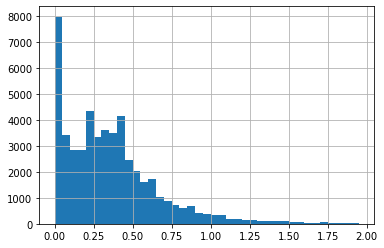

In [120]:
bins = np.arange(0, 2, 0.05)

res_filter.snow_depth[() (res_filter.snow_depth<2)].hist(bins = bins)